In [1]:
import pandas as pd
import glob
import numpy as np

In [2]:
covid_paths = glob.glob("./COVID/*")
covid_class = np.ones(len(covid_paths))

normal_paths = glob.glob("./NORMAL/*")
normal_class = np.zeros(len(normal_paths))

viral_paths = glob.glob("./Viral Pneumonia/*")
viral_class = np.ones(len(viral_paths)) * 2

In [3]:
df_covid = pd.DataFrame([covid_paths, covid_class]).T#, columns = ['img_path', 'class'])
df_normal = pd.DataFrame([normal_paths, normal_class]).T
df_viral = pd.DataFrame([viral_paths, viral_class]).T

In [4]:
df = pd.concat([df_covid, df_normal, df_viral], axis = 0).reset_index(drop = True)

In [5]:
df = df.rename({0 : 'img_path', 1: 'class'}, axis = 1)
df.to_csv("img_paths.csv")

In [6]:
df['class'] = df['class'].astype(str)

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tqdm.keras import TqdmCallback
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator()



model = Sequential()

model.add(Conv2D(256, kernel_size = 3,  input_shape = (100, 100, 3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = 3, activation = 'relu'))
model.add(Flatten())

model.add(Dense(3, activation = 'softmax'))




Using TensorFlow backend.


In [8]:
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
X_train = datagen.flow_from_dataframe(df,
                                      x_col = 'img_path',
                                      y_col = 'class',
                                      class_mode = 'sparse',
                                      batch_size = 16,
                                      target_size = (100, 100))

model.fit(X_train, epochs = 10, verbose = 1)

Found 3836 validated image filenames belonging to 3 classes.
Epoch 1/10
240/240 [==============================] - 246s 1s/step - loss: 84.3052 - accuracy: 0.7393
Epoch 2/10
240/240 [==============================] - 225s 938ms/step - loss: 0.5156 - accuracy: 0.8452
Epoch 3/10
137/240 [================>.............] - ETA: 1:40 - loss: 0.3852 - accuracy: 0.8682

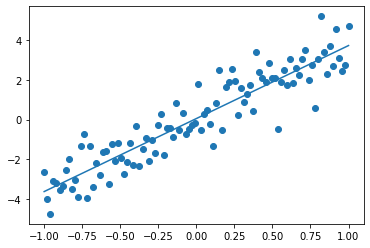

In [90]:
plt.plot(x, model.predict(x))
plt.scatter(x , y)